<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/wat_r1_model-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r1-good.csv?token=AKVFSODHIHS4LLKHYAMU6PK6XFSJG"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r1-mal.csv?token=AKVFSODGM4UD3YONYM7GQG26XFR4I"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

In [4]:
dfg

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
0,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,6,1
1,83,4,2,3,0,0,4,16,18,2,0,0,0,2,1,0.500000,9,5,6,1
2,84,4,2,3,1,1,4,16,18,2,0,0,0,2,1,0.500000,10,4,6,1
3,85,4,2,3,2,1,4,16,18,2,0,0,0,2,1,0.500000,11,3,6,1
4,86,4,2,3,3,1,4,16,18,2,0,0,0,2,1,0.500000,12,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50096,3251158,2,4,4,1,1,2,8,0,0,22,6,10024,3,1,0.333333,15,5,12,1
50097,3251165,2,4,4,2,1,2,8,0,0,22,6,10024,3,1,0.333333,22,4,12,1
50098,3251172,2,4,4,3,1,2,8,0,0,22,6,10024,3,1,0.333333,29,3,12,1
50099,3251179,2,4,4,4,2,2,8,0,0,22,6,10024,3,1,0.333333,36,2,12,1


In [5]:
dfm

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
0,7,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.00,4,7,7,0
1,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.25,8,6,7,0
2,79,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.00,9,5,7,0
3,80,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.00,10,4,7,0
4,81,0,2,3,2,1,4,16,18,2,1,1,1,1,1,1.00,11,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71836,2022096,4,0,4,1,1,2,10,1,1,28,12,11082,5,0,0.00,11,1,1,0
71837,2022103,4,0,4,2,1,2,10,1,1,28,12,11082,5,0,0.00,18,1,1,0
71838,2022110,4,0,4,3,1,2,10,1,1,28,12,11082,5,0,0.00,25,1,1,0
71839,2022117,4,0,4,4,2,2,10,1,1,28,12,11082,5,0,0.00,32,1,1,0


In [6]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [7]:
df.isnull().sum()

time              0
outport           0
inport            0
packet_type       0
flit_id           0
flit_type         0
vnet              0
vc                0
src_ni            0
src_router        0
dst_ni            0
dst_router        0
pkt_chuck         0
hop_count         0
current_hop       0
hop_percentage    0
waiting_time      0
pkt_count         0
pkt_max           0
target            0
dtype: int64

In [8]:
df = df.sort_values('time')
df.to_csv('wat-r1-model.csv',index=False)

In [9]:
df = pd.read_csv("wat-r1-model.csv")
df

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
0,7,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.000000,4,7,7,0
1,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,7,0
2,11,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,6,1
3,79,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.000000,9,5,7,0
4,80,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.000000,10,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,3251158,2,4,4,1,1,2,8,0,0,22,6,10024,3,1,0.333333,15,5,12,1
121938,3251165,2,4,4,2,1,2,8,0,0,22,6,10024,3,1,0.333333,22,4,12,1
121939,3251172,2,4,4,3,1,2,8,0,0,22,6,10024,3,1,0.333333,29,3,12,1
121940,3251179,2,4,4,4,2,2,8,0,0,22,6,10024,3,1,0.333333,36,2,12,1


In [10]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
time,1.000000,0.073879,0.159607,0.020055,0.011723,-0.018399,-0.051942,-0.066694,-0.087413,-0.114742,0.074031,0.073211,0.824835,0.070043,-0.014883,-0.016006,0.043093,-0.150317,-0.200676,0.389502
outport,0.073879,1.000000,-0.171157,-0.202169,-0.000862,0.001354,0.322011,0.353165,-0.108261,-0.262553,-0.220914,0.019252,-0.034422,0.145628,-0.378038,-0.517605,-0.321455,-0.122135,-0.100055,0.217451
inport,0.159607,-0.171157,1.000000,0.008037,-0.015220,0.023905,-0.413283,-0.519151,-0.467346,-0.252382,0.464413,0.368488,-0.004725,0.483866,0.368555,0.435760,0.410964,-0.102964,-0.205400,0.327401
packet_type,0.020055,-0.202169,0.008037,1.000000,0.260563,-0.409233,-0.233214,-0.266011,0.109969,0.032884,0.013854,-0.087901,0.035356,-0.088940,0.097141,0.158695,-0.166409,0.075646,0.019879,-0.010188
flit_id,0.011723,-0.000862,-0.015220,0.260563,1.000000,0.063686,0.155673,0.117454,0.004319,0.001608,-0.049700,-0.022617,0.009426,-0.039891,-0.027415,-0.020030,0.389739,-0.063662,0.012552,0.006536
flit_type,-0.018399,0.001354,0.023905,-0.409233,0.063686,1.000000,-0.244496,-0.184471,-0.006784,-0.002525,0.078058,0.035521,-0.014804,0.062651,0.043057,0.031459,0.489382,-0.064057,0.036032,-0.010265
vnet,-0.051942,0.322011,-0.413283,-0.233214,0.155673,-0.244496,1.000000,0.968480,0.610828,0.366666,-0.850445,-0.463884,-0.037612,-0.277171,0.039630,-0.041159,-0.460507,-0.010017,0.060437,-0.051954
vc,-0.066694,0.353165,-0.519151,-0.266011,0.117454,-0.184471,0.968480,1.000000,0.589522,0.309887,-0.840416,-0.466031,-0.038919,-0.337367,-0.076519,-0.155651,-0.477648,-0.006209,0.084992,-0.078370
src_ni,-0.087413,-0.108261,-0.467346,0.109969,0.004319,-0.006784,0.610828,0.589522,1.000000,0.655230,-0.766468,-0.659911,-0.034296,-0.386319,0.375855,0.365910,-0.298918,0.096626,0.151147,-0.119746
src_router,-0.114742,-0.262553,-0.252382,0.032884,0.001608,-0.002525,0.366666,0.309887,0.655230,1.000000,-0.424242,-0.269277,0.007626,0.139759,0.768263,0.458637,0.014133,0.080274,0.077048,-0.246502


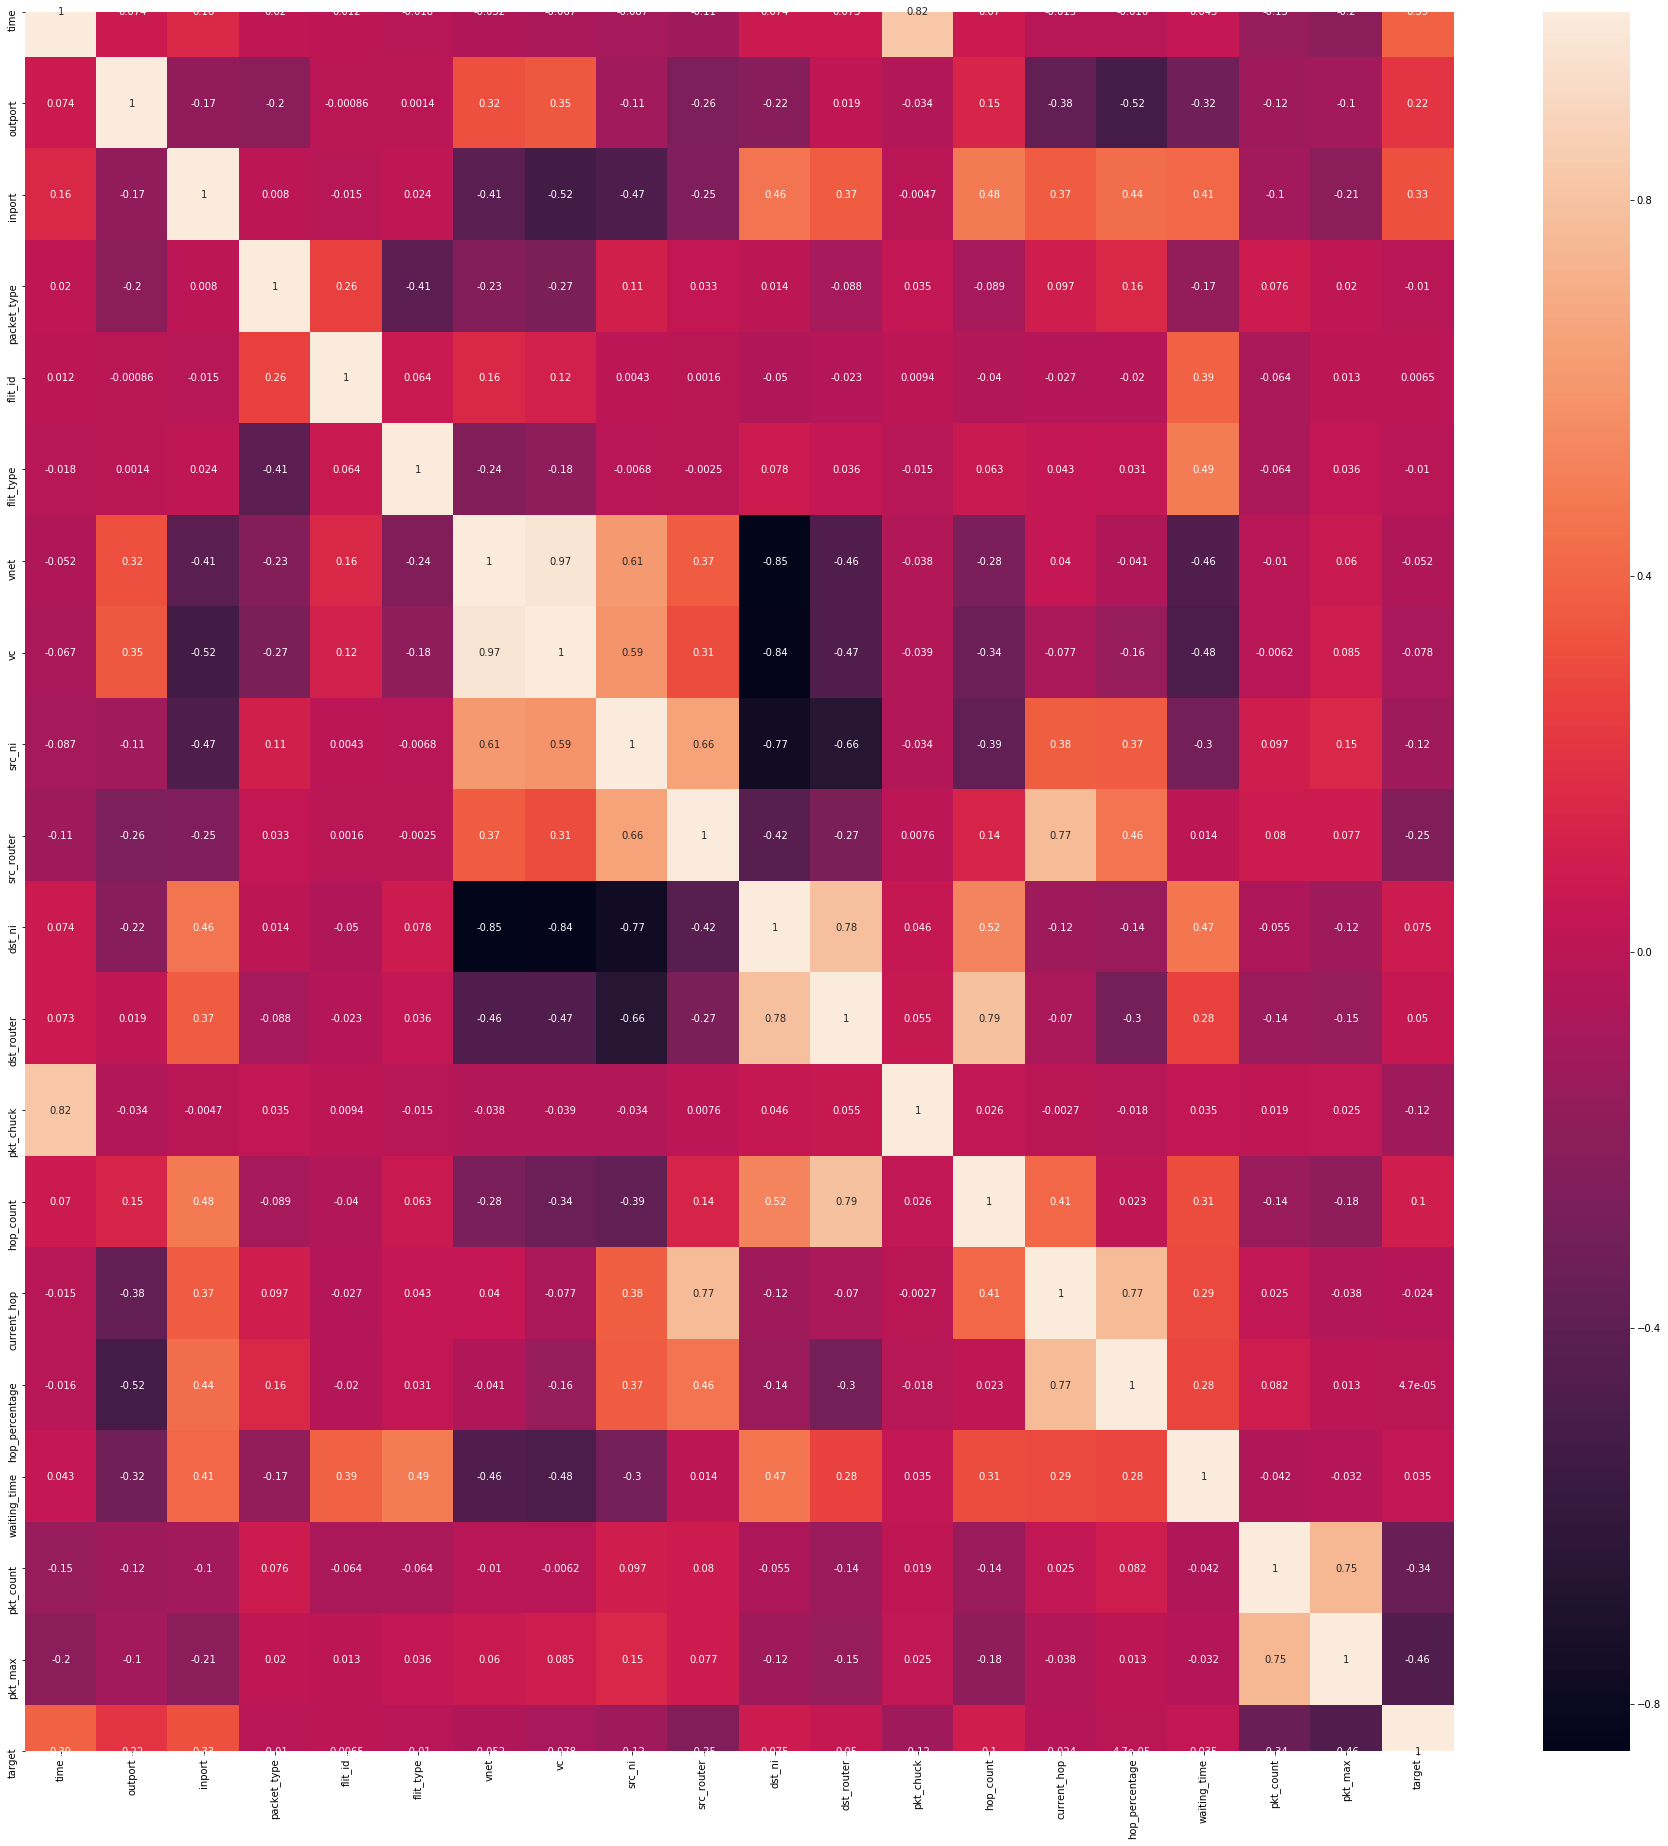

In [11]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [128]:
train_X = df.drop(columns=['target','time'])
columns_X = train_X.copy()
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max
0,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.000000,4,7,7
1,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,7
2,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8,6,6
3,0,2,3,0,0,4,16,18,2,1,1,1,1,1,1.000000,9,5,7
4,0,2,3,1,1,4,16,18,2,1,1,1,1,1,1.000000,10,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,2,4,4,1,1,2,8,0,0,22,6,10024,3,1,0.333333,15,5,12
121938,2,4,4,2,1,2,8,0,0,22,6,10024,3,1,0.333333,22,4,12
121939,2,4,4,3,1,2,8,0,0,22,6,10024,3,1,0.333333,29,3,12
121940,2,4,4,4,2,2,8,0,0,22,6,10024,3,1,0.333333,36,2,12


In [158]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns_X.columns
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.741935,0.466667,0.000090,0.500000,0.0,0.000000,0.000000,0.200000,0.200000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.666667,0.2,0.250000,0.072727,0.166667,0.200000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.666667,0.2,0.250000,0.072727,0.166667,0.166667
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.032258,0.066667,0.000090,0.166667,0.2,1.000000,0.090909,0.133333,0.200000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.580645,0.133333,0.032258,0.066667,0.000090,0.166667,0.2,1.000000,0.109091,0.100000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,0.400000,0.904448,0.500000,0.2,0.333333,0.200000,0.133333,0.366667
121938,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,0.400000,0.904448,0.500000,0.2,0.333333,0.327273,0.100000,0.366667
121939,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,0.400000,0.904448,0.500000,0.2,0.333333,0.454545,0.066667,0.366667
121940,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.000000,0.000000,0.709677,0.400000,0.904448,0.500000,0.2,0.333333,0.581818,0.033333,0.366667


In [159]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_max,target
outport,1.000000,-0.171157,-0.202169,-0.000862,0.001354,0.322011,0.353165,-0.108261,-0.262553,-0.220914,0.019252,-0.034422,0.145628,-0.378038,-0.517605,-0.321455,-0.122135,-0.100055,0.217451
inport,-0.171157,1.000000,0.008037,-0.015220,0.023905,-0.413283,-0.519151,-0.467346,-0.252382,0.464413,0.368488,-0.004725,0.483866,0.368555,0.435760,0.410964,-0.102964,-0.205400,0.327401
packet_type,-0.202169,0.008037,1.000000,0.260563,-0.409233,-0.233214,-0.266011,0.109969,0.032884,0.013854,-0.087901,0.035356,-0.088940,0.097141,0.158695,-0.166409,0.075646,0.019879,-0.010188
flit_id,-0.000862,-0.015220,0.260563,1.000000,0.063686,0.155673,0.117454,0.004319,0.001608,-0.049700,-0.022617,0.009426,-0.039891,-0.027415,-0.020030,0.389739,-0.063662,0.012552,0.006536
flit_type,0.001354,0.023905,-0.409233,0.063686,1.000000,-0.244496,-0.184471,-0.006784,-0.002525,0.078058,0.035521,-0.014804,0.062651,0.043057,0.031459,0.489382,-0.064057,0.036032,-0.010265
vnet,0.322011,-0.413283,-0.233214,0.155673,-0.244496,1.000000,0.968480,0.610828,0.366666,-0.850445,-0.463884,-0.037612,-0.277171,0.039630,-0.041159,-0.460507,-0.010017,0.060437,-0.051954
vc,0.353165,-0.519151,-0.266011,0.117454,-0.184471,0.968480,1.000000,0.589522,0.309887,-0.840416,-0.466031,-0.038919,-0.337367,-0.076519,-0.155651,-0.477648,-0.006209,0.084992,-0.078370
src_ni,-0.108261,-0.467346,0.109969,0.004319,-0.006784,0.610828,0.589522,1.000000,0.655230,-0.766468,-0.659911,-0.034296,-0.386319,0.375855,0.365910,-0.298918,0.096626,0.151147,-0.119746
src_router,-0.262553,-0.252382,0.032884,0.001608,-0.002525,0.366666,0.309887,0.655230,1.000000,-0.424242,-0.269277,0.007626,0.139759,0.768263,0.458637,0.014133,0.080274,0.077048,-0.246502
dst_ni,-0.220914,0.464413,0.013854,-0.049700,0.078058,-0.850445,-0.840416,-0.766468,-0.424242,1.000000,0.784970,0.046047,0.524920,-0.115873,-0.136507,0.471400,-0.055337,-0.119227,0.075179


In [160]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.37528788, -0.71291973,  0.44772591, ..., -0.50405512,
        -0.10260133,  0.02246291],
       [-0.80532603, -0.29421497, -0.28419621, ..., -0.42615442,
        -0.25006331,  0.11930444],
       [-0.80663714, -0.29521692, -0.28936557, ..., -0.42808619,
        -0.24724536,  0.09153142],
       ...,
       [-0.7558658 , -0.11339547, -0.34597397, ...,  0.45459741,
        -0.03088716,  0.16188908],
       [-0.78722128, -0.09568432, -0.39507093, ...,  0.4644139 ,
        -0.02331197,  0.1375618 ],
       [-0.79448407, -0.17593435, -0.2443002 , ...,  0.47788363,
        -0.39584126,  0.08970848]])

In [161]:
pca.explained_variance_ratio_

array([0.35614525, 0.18213494, 0.09870268, 0.08697526, 0.0710063 ,
       0.05223344, 0.04055119, 0.03895065, 0.03174504])

Text(0, 0.5, 'Variance')

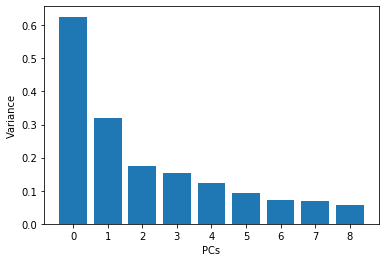

In [162]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [163]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.375288,-0.712920,0.447726,-0.320943,0.701047,0.163467,-0.504055,-0.102601,0.022463
1,-0.805326,-0.294215,-0.284196,-0.487058,0.671608,-0.096548,-0.426154,-0.250063,0.119304
2,-0.806637,-0.295217,-0.289366,-0.488592,0.670773,-0.097767,-0.428086,-0.247245,0.091531
3,0.801544,0.758366,-0.142783,-0.560401,-0.321723,-0.030723,-0.475060,-0.410485,-0.014831
4,0.785373,0.766395,-0.184345,-0.264949,-0.075908,-0.061798,-0.465589,-0.394957,-0.040441
...,...,...,...,...,...,...,...,...,...
121937,-0.741071,-0.142835,-0.206031,-0.221765,-0.208690,-0.064514,0.466480,-0.037083,0.184341
121938,-0.748468,-0.128115,-0.276002,0.036811,-0.215015,-0.067499,0.460539,-0.033985,0.173115
121939,-0.755866,-0.113395,-0.345974,0.295387,-0.221339,-0.070484,0.454597,-0.030887,0.161889
121940,-0.787221,-0.095684,-0.395071,0.618325,0.048555,-0.095422,0.464414,-0.023312,0.137562


In [164]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,target
0,-0.375288,-0.712920,0.447726,-0.320943,0.701047,0.163467,-0.504055,-0.102601,0.022463,0
1,-0.805326,-0.294215,-0.284196,-0.487058,0.671608,-0.096548,-0.426154,-0.250063,0.119304,0
2,-0.806637,-0.295217,-0.289366,-0.488592,0.670773,-0.097767,-0.428086,-0.247245,0.091531,1
3,0.801544,0.758366,-0.142783,-0.560401,-0.321723,-0.030723,-0.475060,-0.410485,-0.014831,0
4,0.785373,0.766395,-0.184345,-0.264949,-0.075908,-0.061798,-0.465589,-0.394957,-0.040441,0
...,...,...,...,...,...,...,...,...,...,...
121937,-0.741071,-0.142835,-0.206031,-0.221765,-0.208690,-0.064514,0.466480,-0.037083,0.184341,1
121938,-0.748468,-0.128115,-0.276002,0.036811,-0.215015,-0.067499,0.460539,-0.033985,0.173115,1
121939,-0.755866,-0.113395,-0.345974,0.295387,-0.221339,-0.070484,0.454597,-0.030887,0.161889,1
121940,-0.787221,-0.095684,-0.395071,0.618325,0.048555,-0.095422,0.464414,-0.023312,0.137562,1


In [165]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,9.223662e-16,1.023444e-15,3.667193e-16,-1.331190e-15,-1.378155e-16,-4.269829e-16,-5.235413e-16,-3.281791e-16,-0.126173
1,9.223662e-16,1.000000e+00,-1.582856e-15,-5.387346e-16,4.772794e-16,1.110519e-15,2.829592e-16,2.243985e-15,1.103814e-15,-0.074500
2,1.023444e-15,-1.582856e-15,1.000000e+00,9.086954e-17,6.512233e-16,-1.734788e-15,1.014697e-15,1.879262e-15,3.897932e-16,-0.332221
3,3.667193e-16,-5.387346e-16,9.086954e-17,1.000000e+00,9.224906e-16,-7.533777e-16,2.274931e-16,1.586224e-16,4.254780e-17,-0.079739
4,-1.331190e-15,4.772794e-16,6.512233e-16,9.224906e-16,1.000000e+00,-4.793098e-15,-6.668875e-16,-2.235469e-16,-2.378552e-16,-0.011480
5,-1.378155e-16,1.110519e-15,-1.734788e-15,-7.533777e-16,-4.793098e-15,1.000000e+00,1.871308e-16,1.605749e-16,6.490710e-16,-0.297695
6,-4.269829e-16,2.829592e-16,1.014697e-15,2.274931e-16,-6.668875e-16,1.871308e-16,1.000000e+00,-7.128964e-16,-8.627984e-16,-0.065037
7,-5.235413e-16,2.243985e-15,1.879262e-15,1.586224e-16,-2.235469e-16,1.605749e-16,-7.128964e-16,1.000000e+00,-2.731953e-16,0.064389
8,-3.281791e-16,1.103814e-15,3.897932e-16,4.254780e-17,-2.378552e-16,6.490710e-16,-8.627984e-16,-2.731953e-16,1.000000e+00,-0.326012
target,-1.261732e-01,-7.449964e-02,-3.322212e-01,-7.973894e-02,-1.148048e-02,-2.976948e-01,-6.503704e-02,6.438911e-02,-3.260125e-01,1.000000


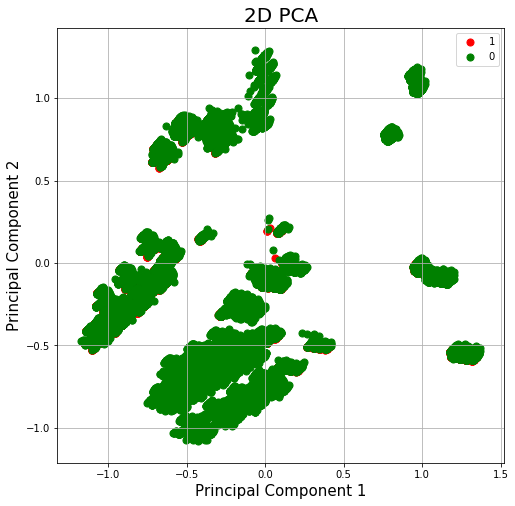

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [166]:
train_Y = df['target']

In [167]:
train_Y.value_counts()

0    71841
1    50101
Name: target, dtype: int64

In [168]:
seed = 7
np.random.seed(seed)

#### machine learning models

In [169]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [170]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

           Specs        Score
17       pkt_max  3749.055511
1         inport  3428.894017
16     pkt_count  1874.429537
8     src_router  1854.944041
0        outport  1438.952258
7         src_ni   314.797696
6             vc   210.226805
11     pkt_chuck   174.617205
12     hop_count   138.017022
5           vnet   136.725387
9         dst_ni   113.091929
10    dst_router    71.109565
15  waiting_time    12.622823
13   current_hop     9.553490
4      flit_type     2.653134
3        flit_id     0.978176
2    packet_type     0.786347


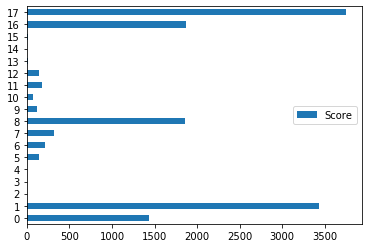

In [171]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns_X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

In [113]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [114]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.416939
         Iterations 10
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.384      
Dependent Variable: target           AIC:              101720.6634
Date:               2020-05-05 03:17 BIC:              101895.4668
No. Observations:   121942           Log-Likelihood:   -50842.    
Df Model:           17               LL-Null:          -82575.    
Df Residuals:       121924           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
outport            0.6745   0.0125  53.7673 0.0000  0.6499  0.6991
inport             0.2801   0.0304   9.2182 0.0000  

In [115]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 81.10347322720695
Test Prediction  81.20803649223515


In [131]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns_X.columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
13,current_hop,6.896939
7,src_ni,5.014826
9,dst_ni,2.870391
0,outport,2.579647
1,inport,2.414197
15,waiting_time,1.285181
6,vc,0.569453
2,packet_type,0.531547
5,vnet,0.090115
4,flit_type,-0.228988


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18827  4221]
 [ 3113 12861]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     23048
           1       0.75      0.81      0.78     15974

    accuracy                           0.81     39022
   macro avg       0.81      0.81      0.81     39022
weighted avg       0.82      0.81      0.81     39022



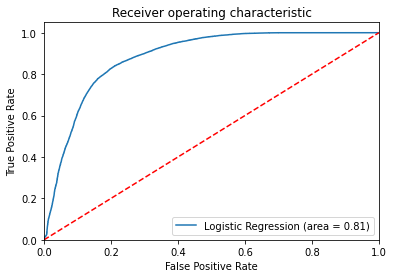

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [109]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [110]:
y_pred_knn= knn.predict(X_test)

In [111]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.7332368547998
Test Prediction  86.83563118240993


In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[19685  3363]
 [ 1774 14200]]


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     23048
           1       0.81      0.89      0.85     15974

    accuracy                           0.87     39022
   macro avg       0.86      0.87      0.87     39022
weighted avg       0.87      0.87      0.87     39022



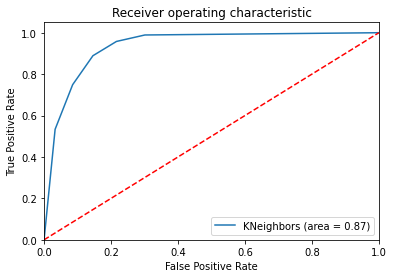

In [ ]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [ ]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb= nb.predict(X_test)

In [ ]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 69.05451037144236
Test Prediction Score 69.15073548254831


In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[14070  8978]
 [ 3060 12914]]


In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70     23048
           1       0.59      0.81      0.68     15974

    accuracy                           0.69     39022
   macro avg       0.71      0.71      0.69     39022
weighted avg       0.73      0.69      0.69     39022



In [ ]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD

Using TensorFlow backend.


In [ ]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 3s 43us/step - loss: 0.5471 - accuracy: 0.7202 - val_loss: 0.4570 - val_accuracy: 0.7921
Epoch 2/10
66336/66336 [==============================] - 3s 39us/step - loss: 0.4474 - accuracy: 0.7982 - val_loss: 0.4384 - val_accuracy: 0.8056
Epoch 3/10
66336/66336 [==============================] - 3s 38us/step - loss: 0.4345 - accuracy: 0.8066 - val_loss: 0.4289 - val_accuracy: 0.8071
Epoch 4/10
66336/66336 [==============================] - 3s 40us/step - loss: 0.4281 - accuracy: 0.8091 - val_loss: 0.4246 - val_accuracy: 0.8105
Epoch 5/10
66336/66336 [==============================] - 3s 41us/step - loss: 0.4250 - accuracy: 0.8113 - val_loss: 0.4225 - val_accuracy: 0.8072
Epoch 6/10
66336/66336 [==============================] - 2s 37us/step - loss: 0.4234 - accuracy: 0.8104 - val_loss: 0.4211 - val_accuracy: 0.8109
Epoch 7/10
66336/66336 [==============================] - 3s 39us/st

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.24%


In [ ]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 2s 36us/step - loss: 0.2415 - accuracy: 0.5843 - val_loss: 0.2318 - val_accuracy: 0.5981
Epoch 2/10
66336/66336 [==============================] - 2s 36us/step - loss: 0.2125 - accuracy: 0.7104 - val_loss: 0.1890 - val_accuracy: 0.7749
Epoch 3/10
66336/66336 [==============================] - 2s 36us/step - loss: 0.1721 - accuracy: 0.7789 - val_loss: 0.1588 - val_accuracy: 0.7833
Epoch 4/10
66336/66336 [==============================] - 2s 36us/step - loss: 0.1524 - accuracy: 0.7950 - val_loss: 0.1472 - val_accuracy: 0.8019
Epoch 5/10
66336/66336 [==============================] - 2s 36us/step - loss: 0.1451 - accuracy: 0.8056 - val_loss: 0.1430 - val_accuracy: 0.8096
Epoch 6/10
66336/66336 [==============================] - 3s 38us/step - loss: 0.1421 - accuracy: 0.8078 - val_loss: 0.1409 - val_accuracy: 0.8087
Epoch 7/10
66336/66336 [==============================] - 3s 39us/st

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.48%


In [ ]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 2s 37us/step - loss: 0.2415 - accuracy: 0.5885 - val_loss: 0.2346 - val_accuracy: 0.5982
Epoch 2/10
66336/66336 [==============================] - 2s 36us/step - loss: 0.2116 - accuracy: 0.6887 - val_loss: 0.1931 - val_accuracy: 0.7201
Epoch 3/10
66336/66336 [==============================] - 2s 37us/step - loss: 0.1716 - accuracy: 0.7522 - val_loss: 0.1527 - val_accuracy: 0.8022
Epoch 4/10
66336/66336 [==============================] - 2s 38us/step - loss: 0.1440 - accuracy: 0.8059 - val_loss: 0.1390 - val_accuracy: 0.8107
Epoch 5/10
66336/66336 [==============================] - 3s 38us/step - loss: 0.1370 - accuracy: 0.8115 - val_loss: 0.1353 - val_accuracy: 0.8113
Epoch 6/10
66336/66336 [==============================] - 3s 42us/step - loss: 0.1342 - accuracy: 0.8135 - val_loss: 0.1328 - val_accuracy: 0.8134
Epoch 7/10
66336/66336 [==============================] - 3s 43us/st

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.84%


In [ ]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 66336 samples, validate on 16584 samples
Epoch 1/30
66336/66336 [==============================] - 4s 55us/step - loss: 0.1344 - accuracy: 0.8036 - val_loss: 0.1153 - val_accuracy: 0.8262
Epoch 2/30
66336/66336 [==============================] - 3s 51us/step - loss: 0.1190 - accuracy: 0.8251 - val_loss: 0.1129 - val_accuracy: 0.8333
Epoch 3/30
66336/66336 [==============================] - 3s 50us/step - loss: 0.1152 - accuracy: 0.8307 - val_loss: 0.1118 - val_accuracy: 0.8344
Epoch 4/30
66336/66336 [==============================] - 3s 50us/step - loss: 0.1130 - accuracy: 0.8342 - val_loss: 0.1076 - val_accuracy: 0.8387
Epoch 5/30
66336/66336 [==============================] - 4s 53us/step - loss: 0.1116 - accuracy: 0.8364 - val_loss: 0.1046 - val_accuracy: 0.8446
Epoch 6/30
66336/66336 [==============================] - 4s 54us/step - loss: 0.1107 - accuracy: 0.8372 - val_loss: 0.1052 - val_accuracy: 0.8446
Epoch 7/30
66336/66336 [==============================] - 3s 52us/st

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.47%


In [ ]:
principal_df[principal_df.duplicated()].shape

(167, 9)

In [ ]:
train_X[train_X.duplicated()].shape

(167, 18)

In [46]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,17,2) ,
            'max_features':range(0,17,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 16, 'max_features': 16}
Accuracy : 0.920996140858659


In [173]:
dt = DecisionTreeClassifier(max_depth=16,max_features=16,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=16, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [174]:
y_pred_dt= dt.predict(X_test)

In [175]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.76362759286059
Test Prediction Score 92.74768079544872


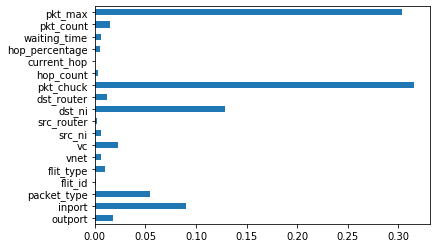

In [178]:
feat_importances = pd.Series(dt.feature_importances_, index=columns_X.columns)
feat_importances.plot(kind='barh')

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[21010  2038]
 [  792 15182]]


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     23048
           1       0.88      0.95      0.91     15974

    accuracy                           0.93     39022
   macro avg       0.92      0.93      0.93     39022
weighted avg       0.93      0.93      0.93     39022



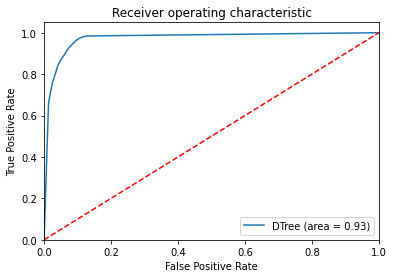

In [ ]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [71]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,17,2),
            'n_estimators':[125,250],
            'max_features':range(0,17,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [72]:
rf = RandomForestClassifier(max_depth=16,max_features=16,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features=16,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [73]:
y_pred_rf= rf.predict(X_test)

In [74]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 96.39893873613121
Test Prediction Score 94.02132130592999


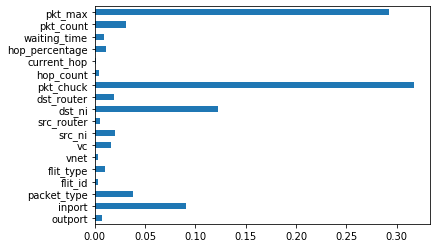

In [102]:
feat_importances = pd.Series(rf.feature_importances_, index=columns_X.columns)
feat_importances.plot(kind='barh')

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[21010  2038]
 [  792 15182]]


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     23048
           1       0.88      0.95      0.91     15974

    accuracy                           0.93     39022
   macro avg       0.92      0.93      0.93     39022
weighted avg       0.93      0.93      0.93     39022



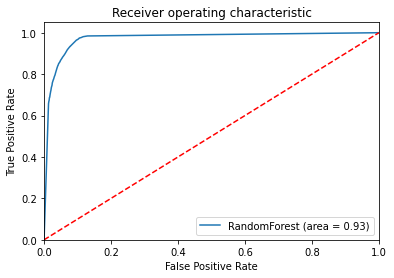

In [ ]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [87]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,17,2),
            'n_estimators':[125,250],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [179]:
xgbc = XGBClassifier(max_depth=16,min_child_weight=1,n_estimators=250,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [181]:
y_pred_xgbc= xgbc.predict(X_test)

In [182]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.39942112879883
Test Prediction Score 97.11701091691866


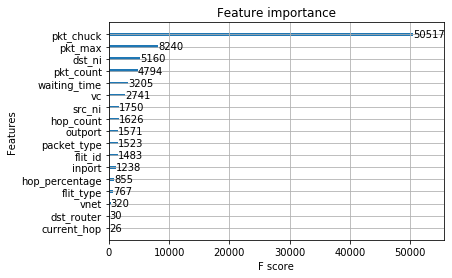

In [183]:
plot_importance(xgbc)
plt.show()

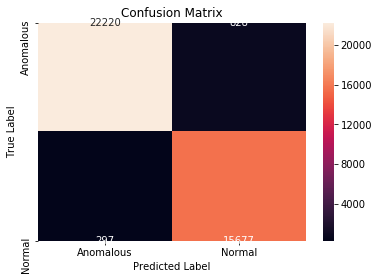

In [190]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     23048
           1       0.95      0.98      0.97     15974

    accuracy                           0.97     39022
   macro avg       0.97      0.97      0.97     39022
weighted avg       0.97      0.97      0.97     39022



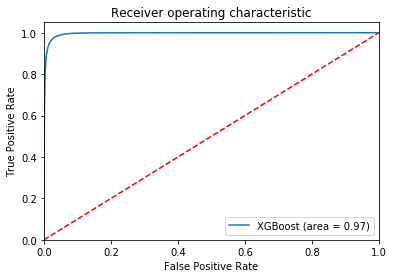

In [95]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [ ]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [ ]:
kscv_roc_auc = roc_auc_score(y_test, y_pred_ksvc)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KSVC (area = %0.2f)' % kscv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KSVC_ROC')
plt.show()

In [45]:
#lightgbm
import lightgbm as lgb

In [65]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

Best parameters: {'learning_rate': 0.2, 'n_estimators': 38}
Accuracy : 0.9121924746743849


In [180]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 250, max_depth = 16, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=16,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=250, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [184]:
y_pred_gbm= gbm.predict(X_test)

In [185]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 94.70815243608297
Test Prediction Score 93.2858387576239


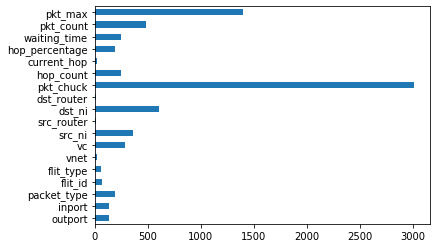

In [186]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns_X.columns)
feat_importances.plot(kind='barh')

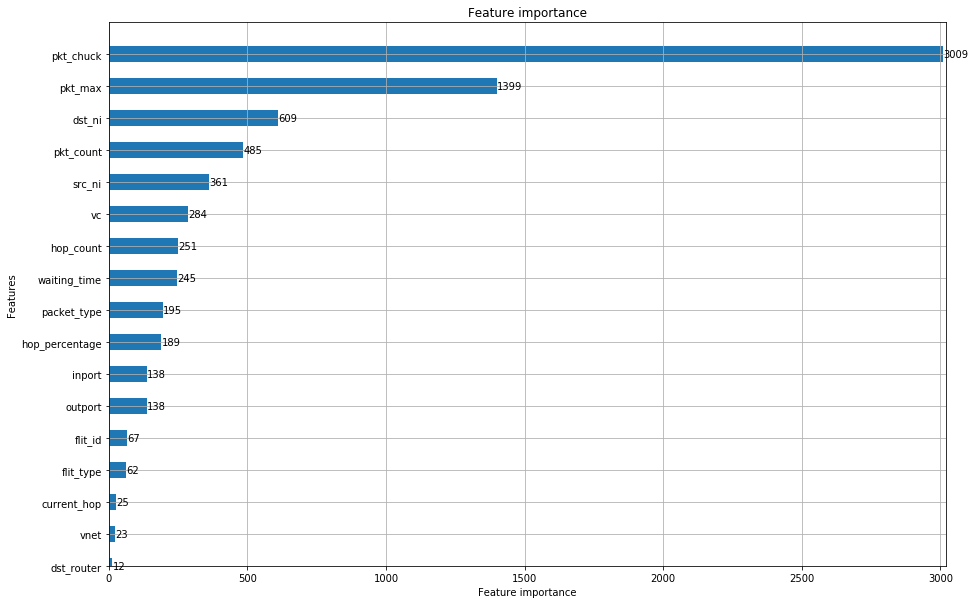

In [187]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,3020), ylim = (0,17), figsize = (15,10))
plt.show()

In [58]:
sorted(gbm.feature_importances_,reverse=True)

[3009,
 1399,
 609,
 485,
 361,
 284,
 251,
 245,
 195,
 189,
 138,
 138,
 67,
 62,
 25,
 23,
 12,
 8]

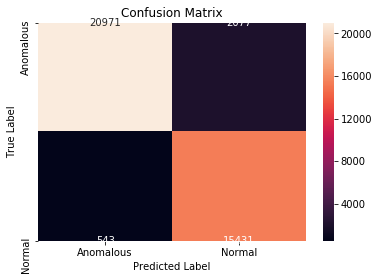

In [188]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [67]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     23048
           1       0.88      0.97      0.92     15974

    accuracy                           0.93     39022
   macro avg       0.93      0.94      0.93     39022
weighted avg       0.94      0.93      0.93     39022



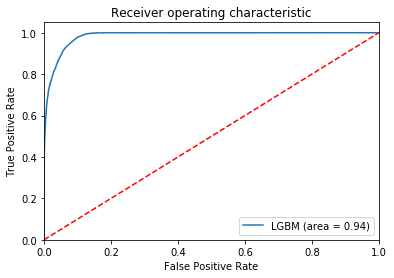

In [69]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()